IS 602 Final Project

David Stern

In [2]:
import os
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pylab as plt
%matplotlib inline
os.chdir('/Users/davidstern/Downloads')

In this project, I explore all Green (Boro) Taxi rides for each year of the program, 2013-2015. I accessed the data from the NYC Open Data website, as it was quickest to download them as csv files and retrieve them locally, rather than pulling the JSON data through the SODA API (the paging limits 50,000 records per pull and slowed the data access considerably). 

https://data.cityofnewyork.us/Transportation/2014-Green-Taxi-Trip-Data/2np7-5jsg
https://data.cityofnewyork.us/Transportation/2015-Green-Taxi-Trip-Data/gi8d-wdg5
https://data.cityofnewyork.us/Transportation/2013-Green-Taxi-Trip-Data/ghpb-fpea

In [3]:
trip_data_2013 = pd.read_csv('2013_Green_Taxi_Trip_Data.csv')
trip_data_2014 = pd.read_csv('2014_Green_Taxi_Trip_Data.csv')
trip_data_2015 = pd.read_csv('2015_Green_Taxi_Trip_Data.csv')

Confirm all have properly loaded:

In [4]:
trip_data_2013.head(2)

,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude,vendor_id
0,12/06/2013 12:11:05 PM,12/06/2013 12:14:06 PM,N,1,40.811981,1,0.50,4.0,0.0,0.5,0,0,NaN,4.5,2,NaN,-73.965065,40.806141,-73.962234,1
1,11/23/2013 01:31:07 AM,11/23/2013 02:36:01 AM,N,1,40.591175,5,14.16,52.5,0.5,0.5,0,0,NaN,53.5,1,NaN,-73.958466,40.719093,-73.965424,2


In [5]:
trip_data_2014.head(2)

,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,vendorid
0,01/13/0010 10:14:22 PM,01/13/0010 10:21:30 PM,N,1,-73.978867,40.683895,-73.996056,40.689190,5,1.07,6,0.5,0.5,0,0,NaN,7.0,2,1,2
1,01/11/0019 06:03:33 PM,01/11/0019 06:08:55 PM,N,1,-73.934334,40.751289,-73.911118,40.752995,1,1.30,6,1.0,0.5,0,0,NaN,7.5,2,1,1


In [6]:
trip_data_2015.head(2)

,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,...,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude,vendorid,Improvement_surcharge
0,01/27/2015 07:30:40 PM,01/27/2015 07:47:34 PM,N,1,40.842724,1,1.67,11.5,1,0.5,...,0,NaN,13.3,2,1,-73.920158,40.835316,-73.914696,2,0.3
1,01/09/2015 03:45:22 PM,01/09/2015 03:54:32 PM,N,1,40.679829,3,1.15,7.5,0,0.5,...,0,NaN,9.8,1,1,-73.985672,40.669933,-73.998367,2,0.3


In [7]:
print 'There were', len(trip_data_2013), 'rides in 2013,', len(trip_data_2014), 'rides in 2014, and', len(trip_data_2015), 'rides in 2015.'

There were 435053 rides in 2013, 15837025 rides in 2014, and 11534883 rides in 2015.


Here we will use pandas' concatenate function to merge all three data sets. The data columns are almost consistent for the three sets, but their order is not. To correct this in our combined data frame, we will perform an inner join. The name of the "vendor id" column in the 2013 data set must also be corrected to be the same as the other sets.

In [8]:
trip_data_2013 = trip_data_2013.rename(columns={'vendor_id': 'vendorid'})
all_trips = pd.concat([trip_data_2013, trip_data_2014, trip_data_2015], axis=0, join='inner')

Verify that we merged the datasets correctly:

In [9]:
len(trip_data_2013) + len(trip_data_2014) + len(trip_data_2015) == len(all_trips)

True

In [10]:
all_trips.head(2)

,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_longitude,Pickup_latitude,Dropoff_longitude,vendorid
0,12/06/2013 12:11:05 PM,12/06/2013 12:14:06 PM,N,1,40.811981,1,0.50,4.0,0.0,0.5,0,0,NaN,4.5,2,NaN,-73.965065,40.806141,-73.962234,1
1,11/23/2013 01:31:07 AM,11/23/2013 02:36:01 AM,N,1,40.591175,5,14.16,52.5,0.5,0.5,0,0,NaN,53.5,1,NaN,-73.958466,40.719093,-73.965424,2


The average trip distance for all rides is about 3 miles:

In [11]:
all_trips['Trip_distance'].mean()

2.9275190036216951

The following calls show us that there are two vendors for the payment system and five payment types. By looking at a histogram of the payment types, we see that there are effectively only two (likely cash and credit card). Since the NYC Open Data website did not contain information on which is which, we will make a determination based on payment patterns. 

In [12]:
all_trips['vendorid'].unique()

array([  1.,   2.,  nan])

In [13]:
all_trips['Payment_type'].unique()

array([  2.,   1.,   4.,   3.,   5.,  nan])

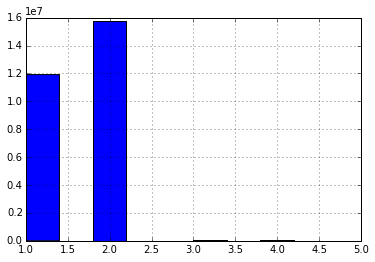

In [14]:
all_trips.Payment_type.hist()

First we will calculate tipping percentages based on the base fare and the total fare. We will then filter the dataset by two payment types (1 and 2, or cash and credit card). The next two plots are histograms of the tip percentages by payment type. It appears that payment type 1 is credit cards, since the highest bars are at 20%, 25%, and 30% - the preset options on taxi payment screens. Payment 2 is cash, since most of the tips are zero. We can surmise that drivers do not report those tips, or they are not recorded in the data collection system. It appears that a high percentage of those customers that pay with credit card opt not to tip at all.

In [15]:
all_trips['tip_pct_of_total'] = all_trips['Tip_amount']/all_trips['Total_amount']
all_trips['tip_pct_of_base'] = all_trips['Tip_amount']/(all_trips['Fare_amount']+all_trips['MTA_tax'])

In [16]:
payment_1_trips = all_trips[all_trips.Payment_type == 1]
payment_2_trips = all_trips[all_trips.Payment_type == 2]

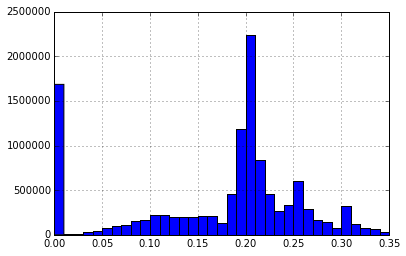

In [17]:
payment_1_trips['tip_pct_of_base'].hist(bins=35, range=[0,0.35])

The average tip for credit card payments is about 18%.

In [18]:
((payment_1_trips['Tip_amount'].mean()/payment_1_trips['Fare_amount'].mean())*100).round(2)

18.27

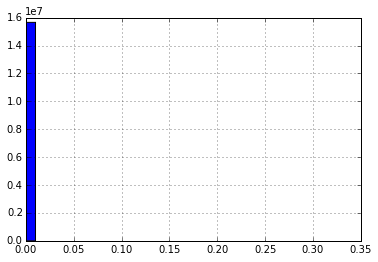

In [19]:
payment_2_trips['tip_pct_of_base'].hist(bins=35, range=[0,0.35])

We can see here that the average tip for payment two (cash) is zero:

In [20]:
payment_2_trips['Tip_amount'].mean().round(2)

0.0

Previous analyses of the two payment systems have found that the two primary vendors calculate the automatic tip options differently. To verify this, we will filter the credit card payments by vendor and see how the mean and distribution of the payments differ

In [21]:
vendor_1_trips = payment_1_trips[payment_1_trips.vendorid == 1]
vendor_2_trips = payment_1_trips[payment_1_trips.vendorid == 2]
vendor_1_tip_pct = ((vendor_1_trips['Tip_amount'].mean()/vendor_1_trips['Fare_amount'].mean())*100).round(2)
vendor_2_tip_pct = ((vendor_2_trips['Tip_amount'].mean()/vendor_2_trips['Fare_amount'].mean())*100).round(2)

Although the tips for taxis that use the "vendor 1" payment software is 17 cents higher on average than those that use "vendor 2", the histograms of the tip percentages show nearly identical distributions, with comparable clusters around the 20%, 25%, and 30% tip options. The distributions for each of the vendors for the tip as a calculation of the total fare, rather than the base, do not seem valid, as they do not show clusters around these figures. It seems that discrepancy between the average tips for the two vendors can be attributed to the much higher percentage of individuals who do not tip in "vendor 2" cabs. There is no evidence based on these plots that the payment systems calculate tips differently in boro taxis.

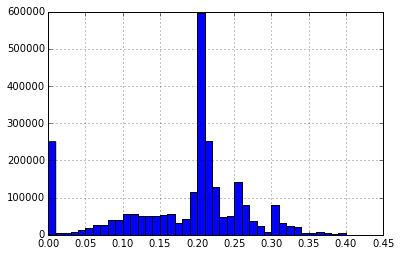

In [22]:
vendor_1_trips['tip_pct_of_base'].hist(bins=40, range=[0,0.4])

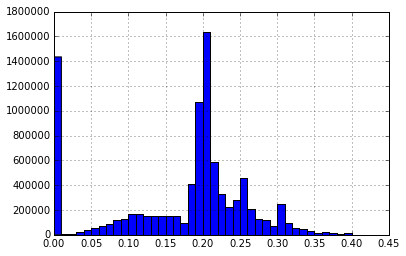

In [23]:
vendor_2_trips['tip_pct_of_base'].hist(bins=40, range=[0,0.4])

Now we will converty the pickup and dropoff times to datetime objects:

In [24]:
all_trips['pickup_datetime'] = pd.to_datetime(all_trips['pickup_datetime'],dayfirst=True)

In [25]:
all_trips['dropoff_datetime'] = pd.to_datetime(all_trips['dropoff_datetime'],dayfirst=True)

This graph shows us the total number of green taxi rides by hour of the day. The results appears as expected - rides decline throughout the night and increase throughout the day. Peak taxi-usage seems to be between 6:00 - 8:00 pm. 

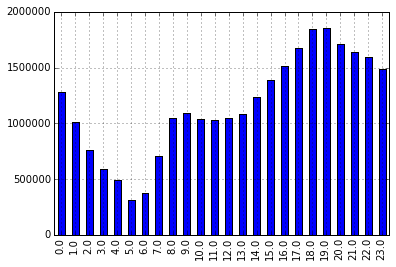

In [26]:
all_trips['pickup_datetime'].dt.hour.value_counts(sort=False).plot(kind='bar')

Now we will add a column that calculates the average trip speed and plot it against the time of day. The following plot shows that the average trip speed increases at a high rate in the early morning and peaks at 5 am, after which it drops precipitously until 17:00 (5 pm). To my suprise, the average trop speed increases every hour from 5 pm to 5 am. 

In [27]:
all_trips['miles_per_hour'] = all_trips['Trip_distance'] /  \
        ((((all_trips['dropoff_datetime'] - all_trips['pickup_datetime']).dt.hours)*60 \
         + (all_trips['dropoff_datetime'] - all_trips['pickup_datetime']).dt.minutes + 1)/60) 
            # add 1 minute for "0" length trips to avoid inf values of mph

In [ ]:
all_trips['hour'] = all_trips['pickup_datetime'].dt.hour
all_trips['price_per_mile'] = all_trips['Total_amount']/all_trips['Trip_distance']

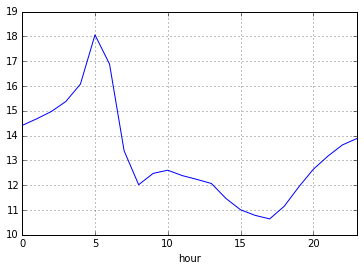

In [38]:
all_trips.groupby(['hour'])['miles_per_hour'].mean().plot()

Now we will do the same for average trip price by time of day, to see if passengers if the amount paid to travel increases depending on when they hail a taxi. To do so, we need to clauclate the average trip speed and also to filter out data that will skew our calculations (all fares or trips listed as 0). The following plot shows us the average price per mile over the course of a typical day. It appears that the amount a passenger pays per mile traveled is highest at midnight, climbs slowly until about 16:00 (4 PM) and then drops every hour until midnight.

In [35]:
sub_trips = all_trips[(all_trips.Total_amount != 0) & (all_trips.Trip_distance != 0)]

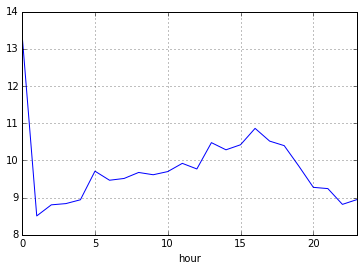

In [36]:
sub_trips.groupby(['hour'])['price_per_mile'].mean().plot()